# Import packages

In [1]:
import os
import pandas as pd
import ptitprince as pt #Ref: https://github.com/pog87/PtitPrince/blob/master/tutorial_python/raincloud_tutorial_python.ipynb
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Custom functions

In [2]:
from histogram_data_cleaning import plot_original_vs_filtered
from histogram_data_parameters import csv_files_in_dir,extract_all_parameters_from_csv_files
from histogram_display import display_all_histogram_as_line_plots
from pooled_data_display import remove_outliers_by_group
from statistics_display import stat_output_as_img

# Read in labeled data

In [3]:
labeled_df = pd.read_csv('input\\Results_labeled.csv')
labeled_df

,GEVAL,treatment,Area,Mean,StdDev,Mode,Min,Max,X,Y,...,%Area,RawIntDen,Slice,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,GEVAL30,DMSO,21094,0.846,0.240,0.596,0.152,1.741,180.726,234.553,...,100,17847.092,1,151,67,108.381,282.126,1.139,0.267,0.301
1,GEVALNull,LowAVN,11986,0.403,0.091,0.426,0.115,1.119,357.028,183.058,...,100,4832.567,1,249,132,149.744,208.986,1.129,0.275,0.297
2,GEVALNull,LowAVN,13724,0.369,0.062,0.398,0.167,0.571,257.716,129.520,...,100,5063.725,1,146,193,26.955,225.301,1.115,0.277,0.304
3,GEVALNull,LowAVN,6216,0.832,0.181,0.906,0.205,1.422,223.279,194.104,...,100,5169.539,1,208,362,83.642,135.000,2.678,0.068,0.178
4,GEVALNull,LowAVN,42200,0.566,0.168,0.694,0.173,1.450,208.022,341.951,...,100,23903.711,1,81,235,138.750,303.630,1.056,0.516,0.540
5,GEVALNull,LowAVN,21577,0.713,0.159,0.739,0.183,1.643,263.806,133.399,...,100,15386.730,1,124,85,164.728,241.739,1.274,0.295,0.358
6,GEVALNull,LowAVN,20785,0.839,0.237,1.006,0.299,1.937,183.133,271.671,...,100,17430.539,1,73,463,64.855,240.067,1.807,0.143,0.254
7,GEVALNull,LowAVN,14665,0.590,0.121,0.643,0.219,1.152,350.903,298.457,...,100,8656.087,1,208,454,60.115,278.369,1.170,0.225,0.231
8,GEVALNull,LowAVN,36389,0.785,0.206,0.946,0.218,1.615,161.323,228.149,...,100,28563.808,1,39,407,51.781,238.069,2.013,0.232,0.454
9,GEVALNull,LowAVN,15603,0.691,0.089,0.699,0.278,1.050,242.025,155.836,...,100,10778.342,1,156,23,123.067,239.350,1.427,0.185,0.258


# Analyses

In [5]:
labeled_df_mean = labeled_df[['GEVAL', 'treatment', 'Mean']]
# labeled_df_mean = labeled_df_mean[labeled_df_mean['treatment']!='MPA']
labeled_df_mean

,GEVAL,treatment,Mean
0,GEVAL30,DMSO,0.846
1,GEVALNull,LowAVN,0.403
2,GEVALNull,LowAVN,0.369
3,GEVALNull,LowAVN,0.832
4,GEVALNull,LowAVN,0.566
5,GEVALNull,LowAVN,0.713
6,GEVALNull,LowAVN,0.839
7,GEVALNull,LowAVN,0.590
8,GEVALNull,LowAVN,0.785
9,GEVALNull,LowAVN,0.691


In [7]:
labeled_df_mean_cleaned = remove_outliers_by_group(labeled_df_mean,
                                                   ['GEVAL', 'treatment'],
                                                   'Mean')
labeled_df_mean_cleaned

,GEVAL,treatment,Mean
0,GEVAL30,DMSO,0.846
50,GEVAL30,DMSO,0.758
51,GEVAL30,DMSO,0.982
52,GEVAL30,DMSO,0.869
53,GEVAL30,DMSO,0.762
54,GEVAL30,DMSO,0.905
55,GEVAL30,DMSO,0.991
57,GEVAL30,DMSO,1.134
58,GEVAL30,DMSO,0.737
39,GEVAL30,HighAVN,0.358


Text(0.5, 1.0, 'Mean values for raw data')

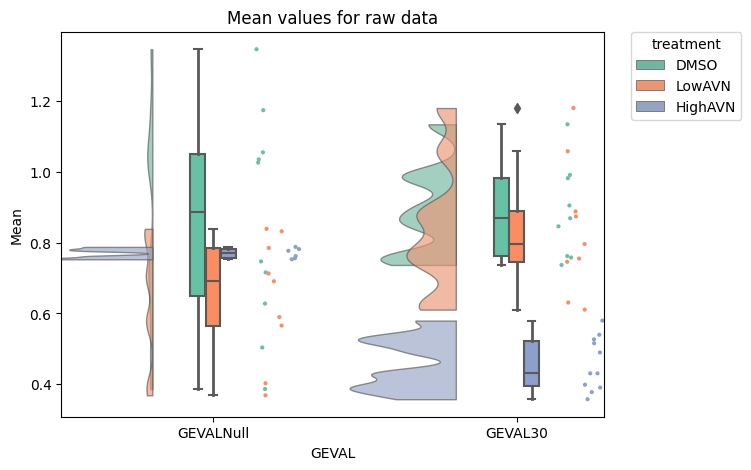

In [9]:
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.RainCloud(
    x = 'GEVAL',
    order=['GEVALNull', 'GEVAL30'],
    y = 'Mean',
    hue='treatment',
    hue_order=['DMSO', 'LowAVN', 'HighAVN'],
    data = labeled_df_mean_cleaned,
    palette ='Set2',
    bw = 0.2,
    width_viol = .7,
    ax = ax,
    orient = 'v',
    move = .2,
    alpha = 0.65,
    dodge=True
)

ax.set_title('Mean values for raw data')

# Statistics

                         sum_sq    df          F    PR(>F)
C(GEVAL)               0.003476   1.0   0.105072  0.747234
C(treatment)           0.806802   2.0  12.194038  0.000052
C(GEVAL):C(treatment)  0.546349   2.0   8.257544  0.000828
Residual               1.587927  48.0        NaN       NaN


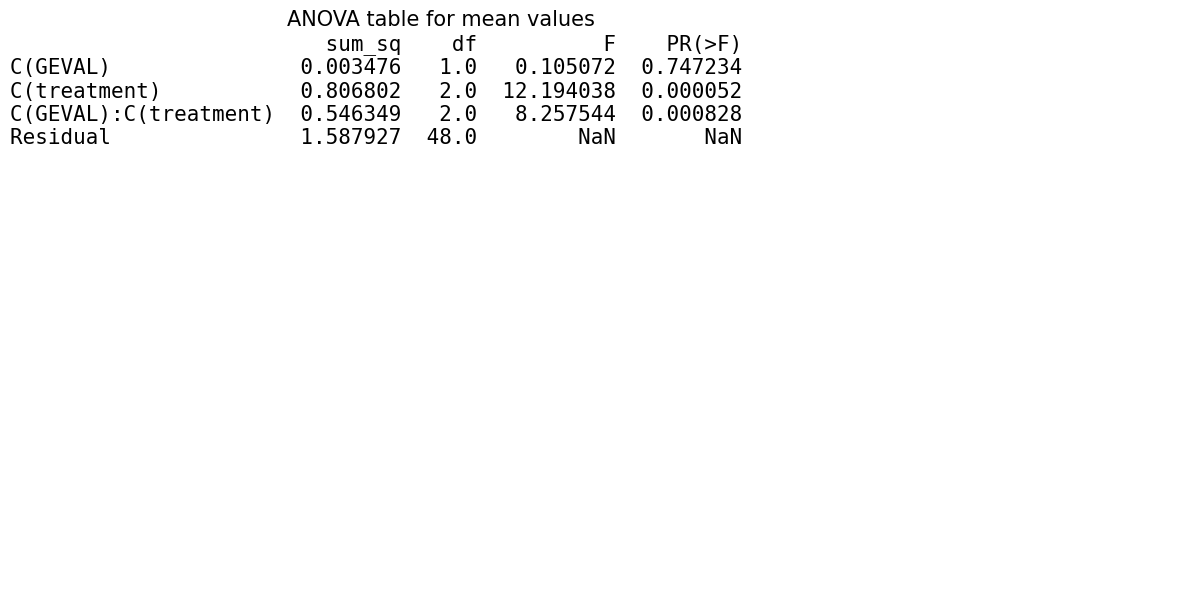

In [10]:
formula = 'Mean ~ C(GEVAL) + C(treatment) + C(GEVAL):C(treatment)'
model = ols(formula, data=labeled_df_mean_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

stat_output_as_img(anova_table, 'ANOVA table for mean values')

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
     GEVAL30_DMSO   GEVAL30_HighAVN  -0.4288    0.0 -0.6715 -0.1862   True
     GEVAL30_DMSO    GEVAL30_LowAVN  -0.0494 0.9921 -0.3039   0.205  False
     GEVAL30_DMSO    GEVALNull_DMSO  -0.0253 0.9996 -0.2733  0.2227  False
     GEVAL30_DMSO GEVALNull_HighAVN  -0.1174 0.8224  -0.402  0.1671  False
     GEVAL30_DMSO  GEVALNull_LowAVN   -0.244 0.0671 -0.4985  0.0105  False
  GEVAL30_HighAVN    GEVAL30_LowAVN   0.3794 0.0004  0.1368   0.622   True
  GEVAL30_HighAVN    GEVALNull_DMSO   0.4035 0.0001  0.1677  0.6394   True
  GEVAL30_HighAVN GEVALNull_HighAVN   0.3114 0.0174  0.0374  0.5854   True
  GEVAL30_HighAVN  GEVALNull_LowAVN   0.1848 0.2301 -0.0578  0.4275  False
   GEVAL30_LowAVN    GEVALNull_DMSO   0.0241 0.9997 -0.2239  0.2722  False
   GEVAL30_LowAVN GEVALNu

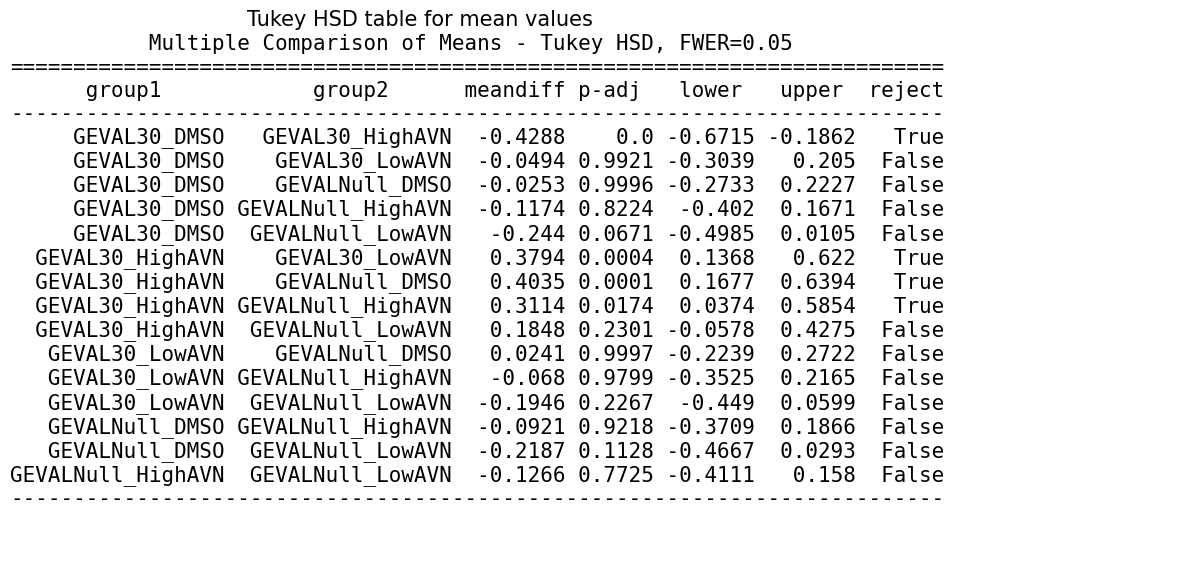

In [11]:
# Perform Tukey's HSD test for the interaction effect
interaction_group = labeled_df_mean_cleaned["GEVAL"] + '_' + \
                    labeled_df_mean_cleaned["treatment"]
tukey_interaction = pairwise_tukeyhsd(endog=labeled_df_mean_cleaned['Mean'],
                                      groups=interaction_group, alpha=0.05)

# Display the Tukey HSD results
print(tukey_interaction)

stat_output_as_img(tukey_interaction, 'Tukey HSD table for mean values')